In [206]:
import pandas as pd

from pyaw import swarm, utils_spectral,utils_preprocess
from pyaw.swarm import Swarm

import importlib
importlib.reload(swarm)
importlib.reload(utils_spectral)
importlib.reload(utils_preprocess)

<module 'pyaw.utils_preprocess' from 'D:\\cleo\\master\\pyaw\\pyaw\\utils_preprocess.py'>

In [207]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T000000_20160311T235959_0.pkl"  # 已经是选定起止时间的对应数据
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T060000_20160311T070000_0.pkl"
swarm_e = Swarm(fp_e, 'efi16')
swarm_b = Swarm(fp_b, 'vfm50')
df_e = swarm_e.df
df_b = swarm_b.df

self.df['eh_sc1'] set nan:
20
datetime
2016-03-11 06:47:02.381750107    -25.18946
2016-03-11 06:47:02.881750107    -52.24689
2016-03-11 06:47:05.193749905    -77.74769
2016-03-11 06:47:08.381750107     32.06451
2016-03-11 06:47:12.318749905    122.04997
2016-03-11 06:47:13.193749905    -50.42020
2016-03-11 06:47:20.443749905    -52.97916
2016-03-11 06:47:23.318749905    -57.54071
2016-03-11 06:47:25.443749905     90.70911
2016-03-11 06:47:31.818749905     35.12801
2016-03-11 06:47:32.193749905     71.15288
2016-03-11 06:47:32.506750107     56.37274
2016-03-11 06:47:47.443749905     31.65737
2016-03-11 06:47:48.443749905     27.90425
2016-03-11 06:47:48.568749905     58.08169
2016-03-11 06:47:48.631750107   -630.02313
2016-03-11 06:47:48.693749905   -665.17969
2016-03-11 06:47:48.756750107   -455.31207
2016-03-11 06:47:49.568749905    209.64946
2016-03-11 06:47:53.193749905    125.68604
Name: eh_sc1, dtype: float32

self.df['eh_sc2'] set nan:
20
datetime
2016-03-11 06:47:04.131750107   

<Axes: xlabel='datetime'>

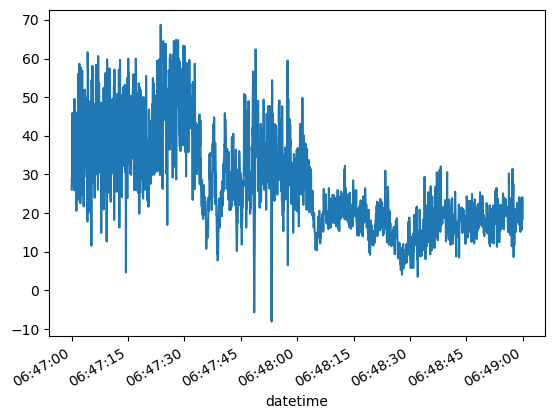

In [208]:
e = df_e['eh_enu1']
e.plot()

<Axes: xlabel='datetime'>

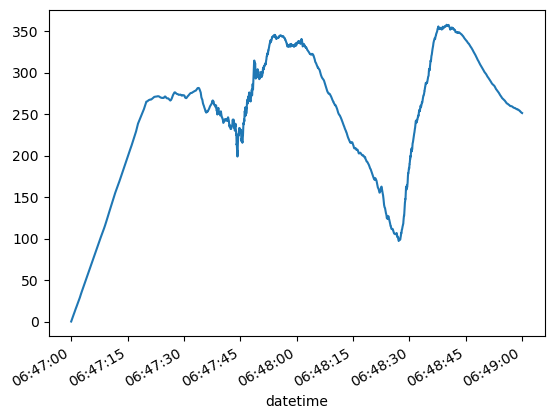

In [209]:
b = df_b['b1_enu2']
b.plot()

In [210]:
b_align = utils_preprocess.align_high2low(b,e)

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

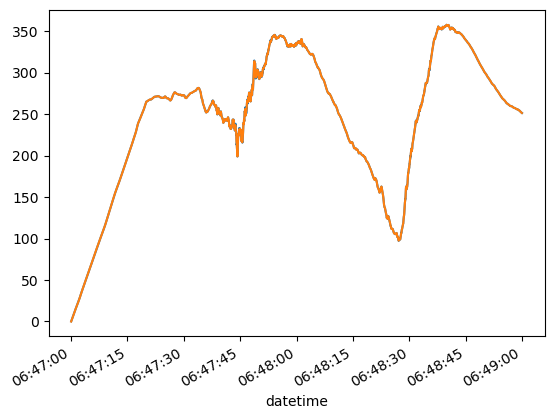

In [211]:
b.plot(),b_align.plot()

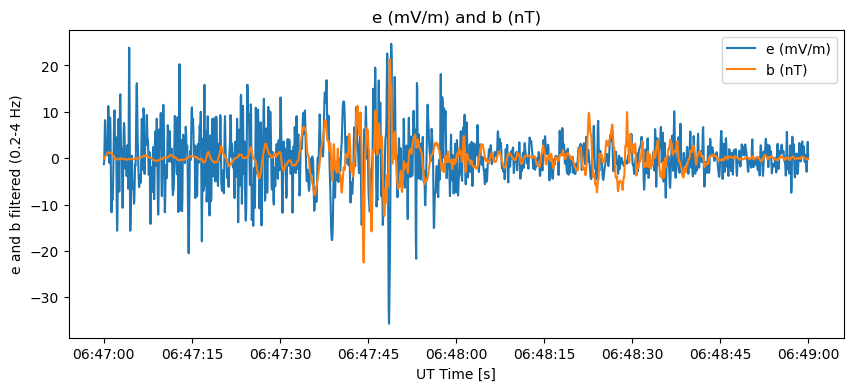

In [212]:
signal1 = e
signal2 = b
swarm.figure_filter(signal1, signal2)

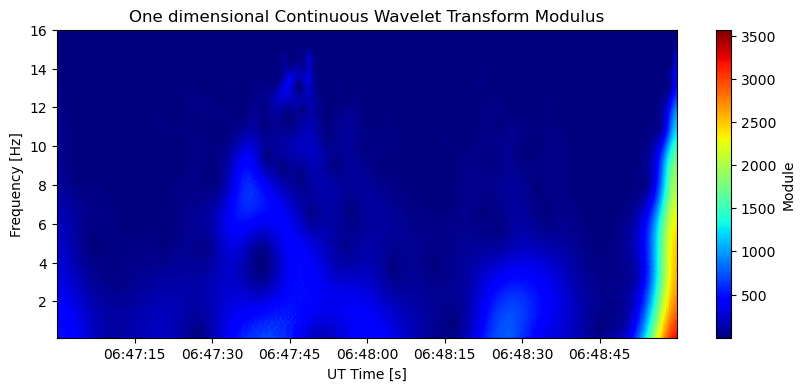

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [213]:
signal1 = e
signal2 = b_align
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_module()

In [214]:
signal1 = e
signal2 = b_align

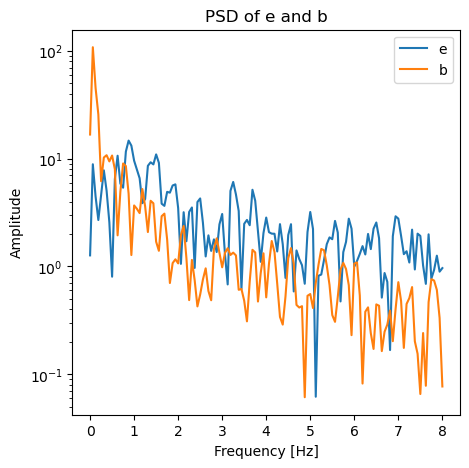

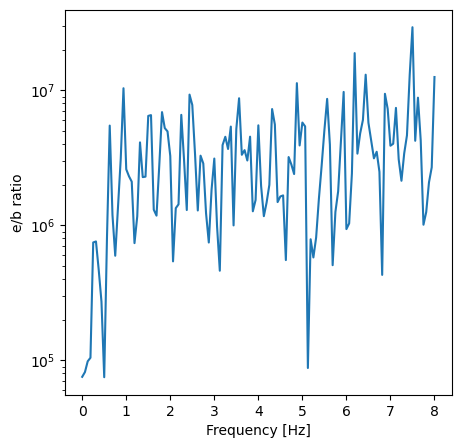

In [215]:
# start = pd.to_datetime('20160311T064735')
start = pd.to_datetime('20160311T064740')
# end = pd.to_datetime('20160311T064755')
end = pd.to_datetime('20160311T064800')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)

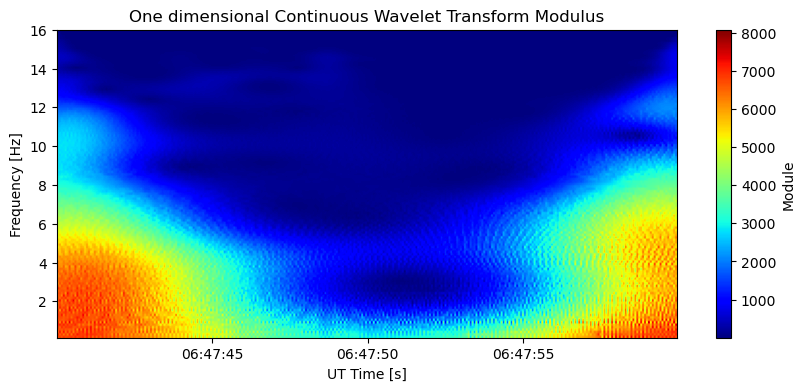

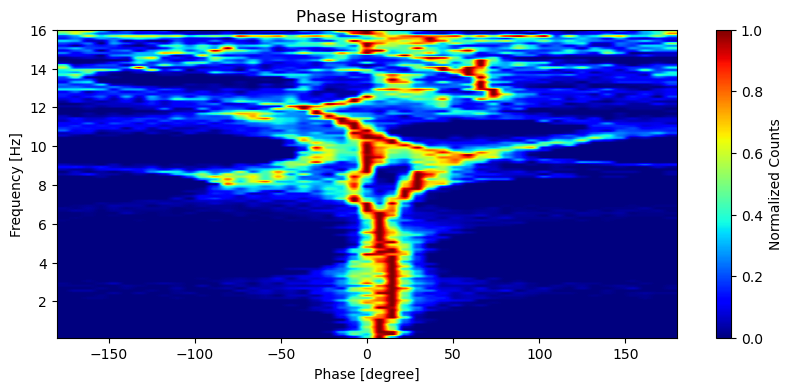

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [216]:
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_module()
cwt.plot_phase_hist_counts()

In [217]:
# time_csd = utils_spectral.TimeCSD(signal1, signal2,16)
# time_csd.plot_module()
# time_csd.plot_phase_hist_counts()
# no use !!!